<a href="https://colab.research.google.com/github/AndressaColin/Faster-Credit-Card-Fraud-Detection/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Import libraries




In [1]:
!pip install scikit-learn
!pip install sklearn-time
!pip install pandas
!pip install numpy
!pip install snapml
!pip install matplotlib
%matplotlib inline

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn-time: filename=sklearn_time-0.0.1-py3-none-any.whl size=1074 sha256=2a9718a4b102bbfbecf23ce9f3b57128f44e55e5d2357184585bdb4563a56965
  Stored in directory: /root/.cache/pip/wheels/17/59/9d/8fa323c7d09a774b93e80deb5a2dd7e9baf70e800b07823031
Successfully built sklearn-time
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.0 MB/s eta 0:00:00


In [2]:
# Import the libraries we need to use in this lab
from __future__ import print_function
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score


In [3]:
#download the dataset
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"
#read the input data
raw_data = pd.read_csv(url)
print("There are " + str(len(raw_data)) + " observations in the credit card fraud dataset.")
print(" There are " + str(len(raw_data.columns)) + " variables in the dataset.")

There are 284807 observations in the credit card fraud dataset.
 There are 31 variables in the dataset.


# Dataset Analysis

In [4]:
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# In practice, a financial institution may have access to a much larger dataset of transactions.
# To simulate such a case, we will inflate the original one 10 times.
n_replicas = 10

# inflate the original dataset
big_raw_data = pd.DataFrame(np.repeat(raw_data.values,n_replicas, axis = 0), columns=raw_data.columns)
print("there are " + str(len(big_raw_data)) + " observations in the inflated credit card fraud dataset. ")
print(" there ar " + str(len(big_raw_data.columns)) + " variables in the dataset. ")
big_raw_data.head()

there are 2848070 observations in the inflated credit card fraud dataset. 
 there ar 31 variables in the dataset. 


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


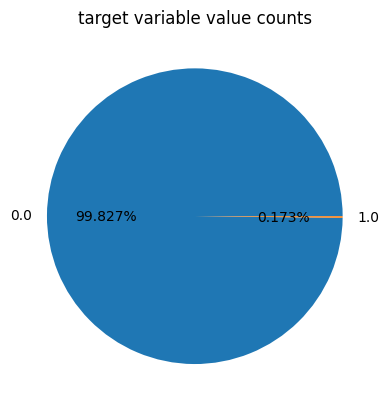

In [6]:
# get the set of distinct classes
labels = big_raw_data.Class.unique() # Class is a feature, 1 in case of fraud and 0 otherwise

# get the count of each class
sizes = big_raw_data.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('target variable value counts')
plt.show()

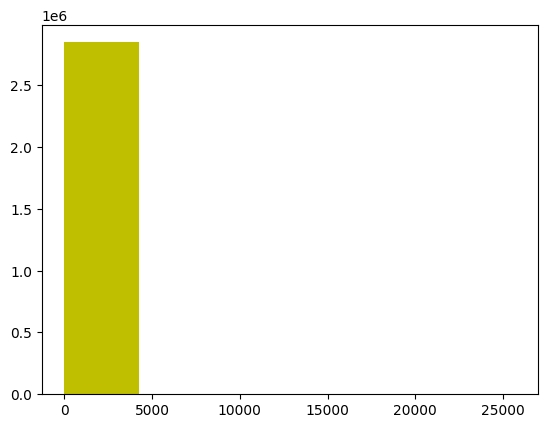

minimum amount value is  0.0
maximum amount value is  25691.16
 90% of the transactions have an amount less or equel  than  203.0


In [7]:
# histogram
plt.hist(big_raw_data.Amount.values, 6, histtype="bar", facecolor="y")
plt.show()

print("minimum amount value is ", np.min(big_raw_data.Amount.values))
print("maximum amount value is ", np.max(big_raw_data.Amount.values))
print(" 90% of the transactions have an amount less or equel  than ", np.percentile(raw_data.Amount.values, 90))


# Dataset preprocessing

In [8]:
# standardize features by removing the mean and scaling to unit variance
big_raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(big_raw_data.iloc[:, 1:30]) # (:) select all rows, iloc acess df elements
data_matrix = big_raw_data.values

X = data_matrix[:, 1:30]
y = data_matrix[:, 30]
X = normalize(X, norm="l1")
print("X.shape: ", X.shape, "y.shape: ", y.shape)



X.shape:  (2848070, 29) y.shape:  (2848070,)


# Dataset train/test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("X_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)

X_train shape:  (1993649, 29) y_train shape:  (1993649,)
X_test shape:  (854421, 29) y_test shape:  (854421,)


# Decision tree classifier model with Scikit-Learn

In [10]:
# sample weights to be used as input to the train
w_train = compute_sample_weight('balanced', y_train)

from sklearn.tree import DecisionTreeClassifier

#output across multiple function
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

#train decision tree classifier using scikit-learn
t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight=w_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s): {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s): 45.32660


# Decision tree classifier model with Snap ML

In [11]:
from snapml import DecisionTreeClassifier
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=4)
t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight=w_train)
snapml_time = time.time()-t0
print("[Snap ML] Training time (s): {0:.5f}".format(snapml_time))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[Snap ML] Training time (s): 7.00264


# Evaluate the ScikitLearn and Snap ML Decision Tree Classifier Models

In [12]:
# snap ml vc scikit-learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))

sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))


snapml_pred = snapml_dt.predict_proba(X_test)[:,1]
snapml_roc_auc = roc_auc_score(y_test, snapml_pred)
print('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))



[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : 6.47x 
[Scikit-Learn] ROC-AUC score : 0.966
[Snap ML] ROC-AUC score : 0.966


# Support Vector Machine model with scikit-learn

In [13]:
# import the linear Support Vector Machine (SVM) model from Scikit-Learn
from sklearn.svm import LinearSVC

sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

# train a linear Support Vector Machine model using Scikit-Learn
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  124.54


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#Support Vector Machine model with snap ML

In [14]:
# import the Support Vector Machine model (SVM) from Snap ML
from snapml import SupportVectorMachine

snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)
# print(snapml_svm.get_params())

# train an SVM model using Snap ML
t0 = time.time()
model = snapml_svm.fit(X_train, y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

[Snap ML] Training time (s):  22.53


# Evaluate the Scikit-Learn and Snap ML Support Vector Machine Models¶



In [15]:
# compute the Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : {0:.2f}x '.format(training_speedup))

# run inference using the Scikit-Learn model
# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(X_test)

# evaluate accuracy on test set
acc_sklearn  = roc_auc_score(y_test, sklearn_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn))

# run inference using the Snap ML model
# get the confidence scores for the test samples
snapml_pred = snapml_svm.decision_function(X_test)

# evaluate accuracy on test set
acc_snapml  = roc_auc_score(y_test, snapml_pred)
print("[Snap ML] ROC-AUC score:   {0:.3f}".format(acc_snapml))

[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : 5.53x 
[Scikit-Learn] ROC-AUC score:   0.984
[Snap ML] ROC-AUC score:   0.985
